## Part B: Predictive Modelling

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('../data/zomato_df_final_data.csv')
display(df.head(10))
print('\nDataset dimensions:', df.shape)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b
5,"46 Kensington Street, Chippendale, Sydney",150.0,"['Desserts', 'Modern Australian']",-33.885475,https://www.zomato.com/sydney/koi-dessert-bar-...,151.201953,02 9212 1230,4.8,Excellent,"Kensington Street, Chippendale",KOI Dessert Bar,"['Casual Dining', 'Dessert Parlour']",575.0,False,#892b04,12.967480,#4186f4
6,"3 Bridge Lane, CBD, Sydney",120.0,"['Cantonese', 'Chinese', 'Yum Cha']",-33.864071,https://www.zomato.com/sydney/mr-wong-cbd,151.208016,02 9114 7317,4.5,Excellent,"Establishment, CBD",Mr. Wong,['Casual Dining'],1623.0,False,#a83703,10.650407,#f45042
7,"490 Crown Street, \tSurry Hills",100.0,['Japanese'],-33.886736,https://www.zomato.com/sydney/toko-surry-hills,151.214023,02 9357 6100,4.4,Very Good,Surry Hills,Toko,['Casual Dining'],1965.0,False,#b53b02,9.105691,#6f706b
8,"The Rocks Centre, 12 Argyle Street, The Rocks...",125.0,"['Japanese', 'Sushi']",-33.858937,https://www.zomato.com/sydney/saké-restaurant-...,151.208318,02 9259 5656,4.3,Very Good,"The Rocks Centre, The Rocks",Saké Restaurant & Bar,"['Fine Dining', 'Wine Bar']",1381.0,False,#c14002,11.036585,#6f706b
9,"Shop 5021, Level 5, Westfield Pitt Street Mal...",70.0,"['Japanese', 'Ramen']",-33.870448,https://www.zomato.com/sydney/ippudo-cbd,151.209288,02 8078 7020,4.5,Excellent,"Westfield Pitt Street Mall, CBD",Ippudo,['Casual Dining'],1840.0,False,#a83703,6.788618,#6f706b



Dataset dimensions: (10500, 17)


In [3]:
df.describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


In [4]:
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

### 1. Feature Engineering

#### 1.1. NA Handling

We can see missing values make up 31.6% of the total number for rows for rating_number, rating_text, and votes. Considering that rating_number and rating_text are our target variables, we cannot reliable impute them. Therefore, we shall remove all of these rows.

In [5]:
na_summary_table = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': df.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0    0.000000
cost                      346    0.032952
cuisine                     0    0.000000
lat                       192    0.018286
link                        0    0.000000
lng                       192    0.018286
phone                       0    0.000000
rating_number            3316    0.315810
rating_text              3316    0.315810
subzone                     0    0.000000
title                       0    0.000000
type                       48    0.004571
votes                    3316    0.315810
groupon                     0    0.000000
color                       0    0.000000
cost_2                    346    0.032952
cuisine_color               0    0.000000


In [6]:
df_clean = df.dropna(subset=['rating_number']) # Create subset of the dataset where rating_number is not NA

We imputed missing values in the cost column using the median of the available data, as it is robust to outliers and better reflects the skewed distribution of restaurant prices. This ensured the column was complete without distorting the overall distribution.

In [7]:
na_summary_table = pd.DataFrame({
    'Missing Values': df_clean.isna().sum(),
    'Percentage': df_clean.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0    0.000000
cost                      103    0.014337
cuisine                     0    0.000000
lat                       115    0.016008
link                        0    0.000000
lng                       115    0.016008
phone                       0    0.000000
rating_number               0    0.000000
rating_text                 0    0.000000
subzone                     0    0.000000
title                       0    0.000000
type                       21    0.002923
votes                       0    0.000000
groupon                     0    0.000000
color                       0    0.000000
cost_2                    103    0.014337
cuisine_color               0    0.000000


In [8]:
# List of numeric columns to impute
cols_to_impute = ['cost', 'cost_2']   # add more columns here if needed

for col in cols_to_impute:
    median_value = df_clean[col].median()
    df_clean.loc[df_clean[col].isna(), col] = median_value

In [9]:
na_summary_table = pd.DataFrame({
    'Missing Values': df_clean.isna().sum(),
    'Percentage': df_clean.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0    0.000000
cost                        0    0.000000
cuisine                     0    0.000000
lat                       115    0.016008
link                        0    0.000000
lng                       115    0.016008
phone                       0    0.000000
rating_number               0    0.000000
rating_text                 0    0.000000
subzone                     0    0.000000
title                       0    0.000000
type                       21    0.002923
votes                       0    0.000000
groupon                     0    0.000000
color                       0    0.000000
cost_2                      0    0.000000
cuisine_color               0    0.000000


Missing values in the type column were imputed with the placeholder "Unknown" to preserve all rows and avoid biasing the dataset. This approach ensures transparency while maintaining consistency across categorical values.

In [10]:
df_clean.loc[df_clean['type'].isna(), 'type'] = [['Unknown']]

Missing latitude and longitude values were imputed using the median coordinates of their respective subzone, ensuring restaurants could still be included in geospatial analysis. This approach preserves data completeness while maintaining spatial consistency at the suburb level. However, we are still left with 14 missing values in both latitude and longitude.

In [11]:
# Impute latitude by suburb
df_clean.loc[df_clean['lat'].isna(), 'lat'] = (
    df_clean.groupby('subzone')['lat'].transform('median')
)

# Impute longitude by suburb
df_clean.loc[df_clean['lng'].isna(), 'lng'] = (
    df_clean.groupby('subzone')['lng'].transform('median')
)

In [12]:
na_summary_table = pd.DataFrame({
    'Missing Values': df_clean.isna().sum(),
    'Percentage': df_clean.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0    0.000000
cost                        0    0.000000
cuisine                     0    0.000000
lat                        14    0.001949
link                        0    0.000000
lng                        14    0.001949
phone                       0    0.000000
rating_number               0    0.000000
rating_text                 0    0.000000
subzone                     0    0.000000
title                       0    0.000000
type                        0    0.000000
votes                       0    0.000000
groupon                     0    0.000000
color                       0    0.000000
cost_2                      0    0.000000
cuisine_color               0    0.000000


For the remaining 14 rows, we standardized the subzone by extracting the area name after the final comma (e.g., Sydney, CBD → CBD) and then imputed missing coordinates using the median latitude and longitude of this cleaned subzone. This refinement allowed us to recover additional locations while maintaining consistency with the broader geospatial imputation strategy.

In [13]:
# Create subzone_clean safely with .loc
df_clean.loc[:, 'subzone_clean'] = (
    df_clean['subzone'].str.split(',').str[-1].str.strip()
)

# Impute latitude
df_clean.loc[df_clean['lat'].isna(), 'lat'] = (
    df_clean.groupby('subzone_clean')['lat'].transform('median')
)

# Impute longitude
df_clean.loc[df_clean['lng'].isna(), 'lng'] = (
    df_clean.groupby('subzone_clean')['lng'].transform('median')
)

C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\2552737669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'subzone_clean'] = (


In [14]:
na_summary_table = pd.DataFrame({
    'Missing Values': df_clean.isna().sum(),
    'Percentage': df_clean.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0         0.0
cost                        0         0.0
cuisine                     0         0.0
lat                         0         0.0
link                        0         0.0
lng                         0         0.0
phone                       0         0.0
rating_number               0         0.0
rating_text                 0         0.0
subzone                     0         0.0
title                       0         0.0
type                        0         0.0
votes                       0         0.0
groupon                     0         0.0
color                       0         0.0
cost_2                      0         0.0
cuisine_color               0         0.0
subzone_clean               0         0.0


#### 1.2. Encoding

In [15]:
order = ["Poor", "Average", "Good", "Very Good", "Excellent"]
df_clean['rating_text_encoded'] = pd.Categorical(df_clean['rating_text'], categories=order, ordered=True).codes

C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\4170011059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rating_text_encoded'] = pd.Categorical(df_clean['rating_text'], categories=order, ordered=True).codes


#### 1.3. Create Useful Features

In [16]:
df_clean.loc[:, 'cuisine'] = df_clean['cuisine'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Create cuisine diversity feature
df_clean.loc[:, 'cuisine_diversity'] = df_clean['cuisine'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Quick check
print(df_clean[['cuisine', 'cuisine_diversity']].head())
print(df_clean['cuisine_diversity'].describe())

                               cuisine  cuisine_diversity
0   [Hot Pot, Korean BBQ, BBQ, Korean]                  4
1  [Cafe, Coffee and Tea, Salad, Poké]                  4
2                           [Japanese]                  1
3                  [Modern Australian]                  1
4                        [Thai, Salad]                  2
count    7184.000000
mean        1.634048
std         0.828535
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: cuisine_diversity, dtype: float64


C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\2141405594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'cuisine_diversity'] = df_clean['cuisine'].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [17]:
df_clean.loc[:, 'rating_binary'] = df_clean['rating_text'].apply(
    lambda x: 1 if x in ['Good', 'Very Good', 'Excellent'] else 0
)

C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\3909151202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'rating_binary'] = df_clean['rating_text'].apply(


In [18]:
df_clean["rating_text_encoded"] = df_clean["rating_text_encoded"].astype("float64")
df_clean["cuisine_diversity"] = df_clean["cuisine_diversity"].astype("float64")
df_clean["rating_binary"] = df_clean["rating_binary"].astype("float64")

C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\3158117217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["rating_text_encoded"] = df_clean["rating_text_encoded"].astype("float64")
C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\3158117217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["cuisine_diversity"] = df_clean["cuisine_diversity"].astype("float64")
C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\3158117217.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [19]:
display(df_clean.head(10))
#df_clean.to_csv("../data/cleaned_df.csv", index=False)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,...,type,votes,groupon,color,cost_2,cuisine_color,subzone_clean,rating_text_encoded,cuisine_diversity,rating_binary
0,"371A Pitt Street, CBD, Sydney",50.0,"[Hot Pot, Korean BBQ, BBQ, Korean]",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,...,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b,CBD,3.0,4.0,1.0
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"[Cafe, Coffee and Tea, Salad, Poké]",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",...,['Café'],3236.0,False,#9c3203,7.560976,#6f706b,Alexandria,4.0,4.0,1.0
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,[Japanese],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",...,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b,Pyrmont,4.0,1.0,1.0
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,[Modern Australian],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,...,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4,Circular Quay,4.0,1.0,1.0
4,"20 Campbell Street, Chinatown, Sydney",55.0,"[Thai, Salad]",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,...,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b,Chinatown,4.0,2.0,1.0
5,"46 Kensington Street, Chippendale, Sydney",150.0,"[Desserts, Modern Australian]",-33.885475,https://www.zomato.com/sydney/koi-dessert-bar-...,151.201953,02 9212 1230,4.8,Excellent,"Kensington Street, Chippendale",...,"['Casual Dining', 'Dessert Parlour']",575.0,False,#892b04,12.967480,#4186f4,Chippendale,4.0,2.0,1.0
6,"3 Bridge Lane, CBD, Sydney",120.0,"[Cantonese, Chinese, Yum Cha]",-33.864071,https://www.zomato.com/sydney/mr-wong-cbd,151.208016,02 9114 7317,4.5,Excellent,"Establishment, CBD",...,['Casual Dining'],1623.0,False,#a83703,10.650407,#f45042,CBD,4.0,3.0,1.0
7,"490 Crown Street, \tSurry Hills",100.0,[Japanese],-33.886736,https://www.zomato.com/sydney/toko-surry-hills,151.214023,02 9357 6100,4.4,Very Good,Surry Hills,...,['Casual Dining'],1965.0,False,#b53b02,9.105691,#6f706b,Surry Hills,3.0,1.0,1.0
8,"The Rocks Centre, 12 Argyle Street, The Rocks...",125.0,"[Japanese, Sushi]",-33.858937,https://www.zomato.com/sydney/saké-restaurant-...,151.208318,02 9259 5656,4.3,Very Good,"The Rocks Centre, The Rocks",...,"['Fine Dining', 'Wine Bar']",1381.0,False,#c14002,11.036585,#6f706b,The Rocks,3.0,2.0,1.0
9,"Shop 5021, Level 5, Westfield Pitt Street Mal...",70.0,"[Japanese, Ramen]",-33.870448,https://www.zomato.com/sydney/ippudo-cbd,151.209288,02 8078 7020,4.5,Excellent,"Westfield Pitt Street Mall, CBD",...,['Casual Dining'],1840.0,False,#a83703,6.788618,#6f706b,CBD,4.0,2.0,1.0


### 2. Regression Modelling

#### 2.1. Model A: Linear Regression

In [20]:
num_features = ['cost', 'lat', 'lng', 'votes', 'cost_2', 'rating_text_encoded', 'cuisine_diversity']

X_reg = df_clean[num_features]
y_reg = df_clean['rating_number']

In [21]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train_reg)

X_train_reg_scaled = scaler.transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Predictions
y_pred_lr = lin_reg.predict(X_test_reg_scaled)

In [25]:
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

MSE: 0.0458
RMSE: 0.2141
R²: 0.7828


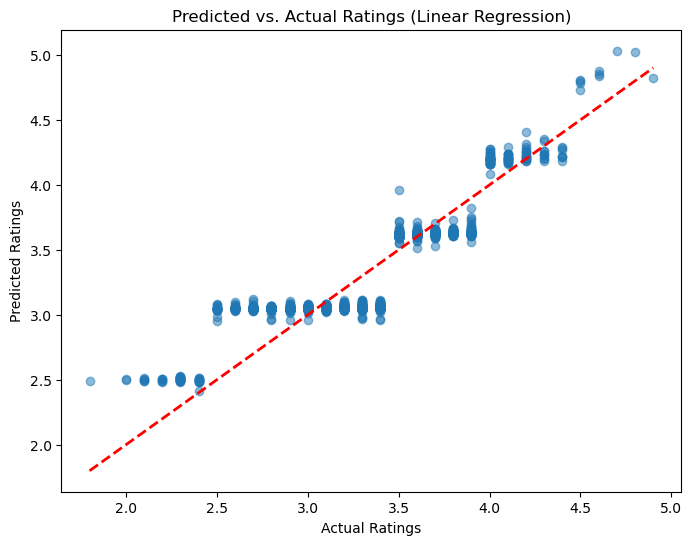

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)  # 45-degree line

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs. Actual Ratings (Linear Regression)")
plt.savefig("../visualisations/predicted_vs_actual_lr.png", dpi=300, bbox_inches="tight")
plt.show()

In [27]:
with open("../models/lin_reg_model.pkl", "wb") as f:
    pickle.dump(lin_reg, f)

#### 2.2. Model B: Gradient Descent Regression

In [28]:
sgd_reg = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X_train_reg_scaled, y_train_reg)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [29]:
y_pred_sgd = sgd_reg.predict(X_test_reg_scaled)

In [30]:
mse_sgd = mean_squared_error(y_test_reg, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
r2_sgd = r2_score(y_test_reg, y_pred_sgd)

print(f"MSE: {mse_sgd:.4f}")
print(f"RMSE: {rmse_sgd:.4f}")
print(f"R²: {r2_sgd:.4f}")

MSE: 0.0458
RMSE: 0.2141
R²: 0.7828


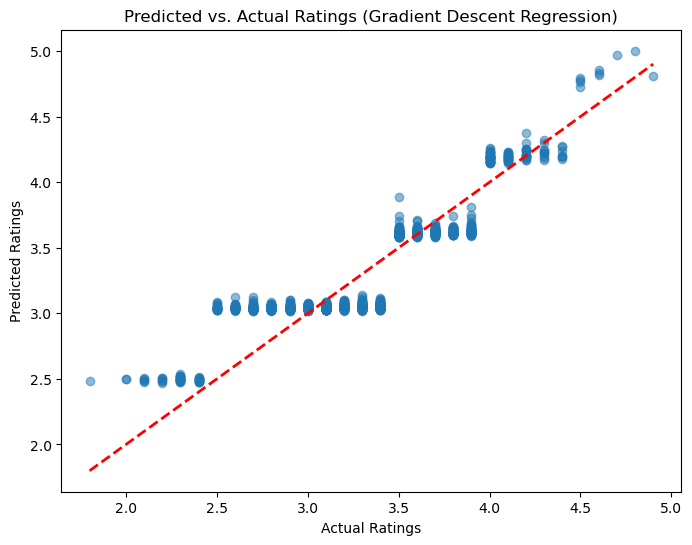

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_sgd, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)  # 45-degree line

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs. Actual Ratings (Gradient Descent Regression)")
plt.savefig("../visualisations/predicted_vs_actual_sgd.png", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
with open("../models/sgd_reg_model.pkl", "wb") as f:
    pickle.dump(sgd_reg, f)

### 3. Classification Modelling

In [33]:
num_features_2 = ['cost', 'lat', 'lng', 'votes', 'cost_2', 'cuisine_diversity']

X_clf = df_clean[num_features_2]
y_clf = df_clean['rating_binary']

In [34]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [35]:
scaler_2 = StandardScaler()
scaler_2.fit(X_train_clf)

X_train_clf_scaled = scaler_2.transform(X_train_clf)
X_test_clf_scaled = scaler_2.transform(X_test_clf)

#### 3.1. Logistic Regression

In [36]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

In [38]:
# Predictions
y_pred_clf = log_reg.predict(X_test_clf_scaled)

# # Evaluation
# print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))

# Evaluation
acc_clf = accuracy_score(y_test_clf, y_pred_clf)
prec_clf = precision_score(y_test_clf, y_pred_clf)
rec_clf = recall_score(y_test_clf, y_pred_clf)
f1_clf = f1_score(y_test_clf, y_pred_clf)

# Append results to table
results = pd.concat([
    results,
    pd.DataFrame([{
        'Model': 'Logistic Regression',
        'Accuracy': acc_clf,
        'Precision': prec_clf,
        'Recall': rec_clf,
        'F1': f1_clf
    }])
], ignore_index=True)

# Show results
print(results)

                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.836465    0.85213  0.658915  0.743169


C:\Users\Nigel\AppData\Local\Temp\ipykernel_40264\373170222.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([


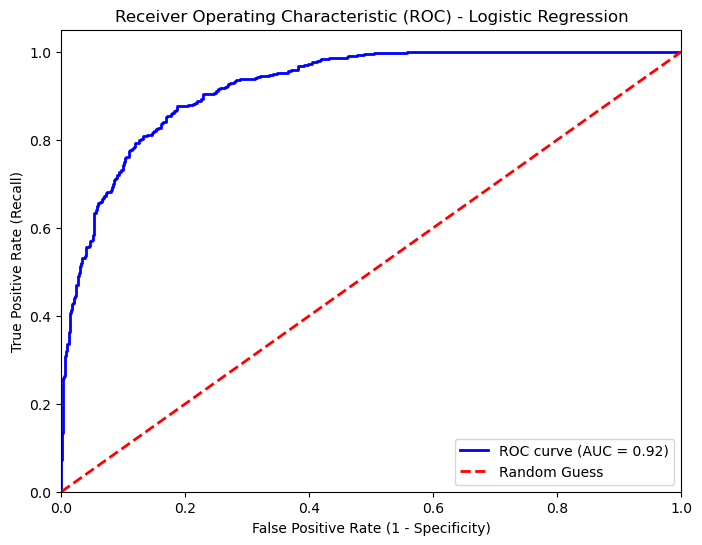

In [39]:
# Predicted probabilities for the positive class
y_probs = log_reg.predict_proba(X_test_clf_scaled)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig("../visualisations/roc_curve_logistic_regression.png", dpi=300, bbox_inches="tight")
plt.show()

### Discussion of Logistic Regression Results  

The Logistic Regression model achieved an overall accuracy of **83.6%**, demonstrating solid performance in predicting binary restaurant ratings.  

- For the **negative class (0)**, the model achieved high recall (**94%**) and a strong F1-score (**0.88**), showing that it was very effective at correctly identifying negative ratings.  
- For the **positive class (1)**, precision was slightly higher (**0.85**) but recall dropped to **66%**, with an F1-score of **0.74**. This indicates the model was more conservative when predicting positive ratings, resulting in fewer false positives but more false negatives.  
- The **confusion matrix** confirms this: the model correctly classified 862 negatives and 340 positives but misclassified 176 positives as negatives.  

Overall, Logistic Regression provided a strong baseline, excelling at detecting negative ratings but underperforming slightly on positive ratings. This imbalance suggests there may be room for improvement through techniques such as resampling, adjusting class weights, or trying more complex classifiers.  

In [40]:
with open("../models/log_reg_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

### 4. Other Models

#### 4.1. Random Forest

In [41]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_rf = rf_clf.predict(X_test_clf)

# Evaluation
acc_rf = accuracy_score(y_test_clf, y_pred_rf)
prec_rf = precision_score(y_test_clf, y_pred_rf)
rec_rf = recall_score(y_test_clf, y_pred_rf)
f1_rf = f1_score(y_test_clf, y_pred_rf)

# Append results to table
results = pd.concat([
    results,
    pd.DataFrame([{
        'Model': 'Random Forest Classifier',
        'Accuracy': acc_rf,
        'Precision': prec_rf,
        'Recall': rec_rf,
        'F1': f1_rf
    }])
], ignore_index=True)

# Show results
print(results)

                      Model  Accuracy  Precision    Recall        F1
0       Logistic Regression  0.836465   0.852130  0.658915  0.743169
1  Random Forest Classifier  0.831594   0.763462  0.769380  0.766409


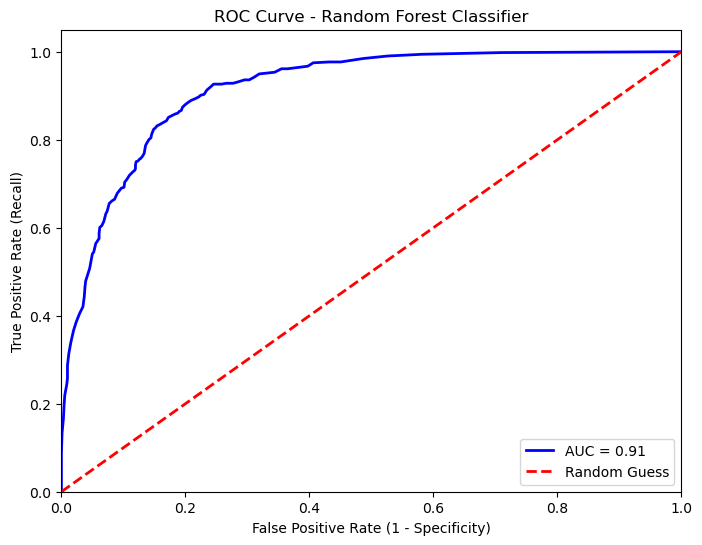

In [55]:
# ROC Curve
y_probs_rf = rf_clf.predict_proba(X_test_clf)[:, 1]   # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig("../visualisations/roc_curve_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [42]:
with open("../models/rf_clf_model.pkl", "wb") as f:
    pickle.dump(rf_clf, f)

#### 3.3. Gradient Boosted Trees

In [43]:
# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_gb = gb_clf.predict(X_test_clf)

# Evaluation
acc_gb = accuracy_score(y_test_clf, y_pred_gb)
prec_gb = precision_score(y_test_clf, y_pred_gb)
rec_gb = recall_score(y_test_clf, y_pred_gb)
f1_gb = f1_score(y_test_clf, y_pred_gb)

# Append results to table
results = pd.concat([
    results,
    pd.DataFrame([{
        'Model': 'Gradient Boosting Classifier',
        'Accuracy': acc_gb,
        'Precision': prec_gb,
        'Recall': rec_gb,
        'F1': f1_gb
    }])
], ignore_index=True)

# Show results
print(results)

                          Model  Accuracy  Precision    Recall        F1
0           Logistic Regression  0.836465   0.852130  0.658915  0.743169
1      Random Forest Classifier  0.831594   0.763462  0.769380  0.766409
2  Gradient Boosting Classifier  0.839248   0.766355  0.794574  0.780209


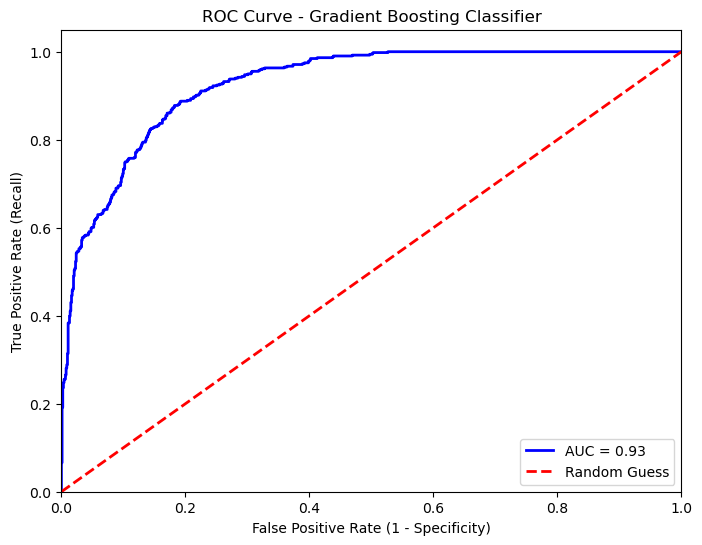

In [56]:
# ROC Curve
y_probs_gb = gb_clf.predict_proba(X_test_clf)[:, 1]   # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.savefig("../visualisations/roc_curve_gradient_boosting.png", dpi=300, bbox_inches="tight")
plt.show()

In [44]:
with open("../models/gb_clf_model.pkl", "wb") as f:
    pickle.dump(gb_clf, f)

#### 3.4. SVM

In [58]:
# Train SVM Classifier with RBF kernel
svc = SVC(kernel='rbf', C=100, gamma=0.1, probability=True, random_state=42)
svc.fit(X_train_clf_scaled, y_train_clf)

# Predictions
y_pred_svc = svc.predict(X_test_clf_scaled)

# Evaluation
acc_svc = accuracy_score(y_test_clf, y_pred_svc)
prec_svc = precision_score(y_test_clf, y_pred_svc)
rec_svc = recall_score(y_test_clf, y_pred_svc)
f1_svc = f1_score(y_test_clf, y_pred_svc)

# Append results to table
results = pd.concat([
    results,
    pd.DataFrame([{
        'Model': 'SVM Classifier (RBF)',
        'Accuracy': acc_svc,
        'Precision': prec_svc,
        'Recall': rec_svc,
        'F1': f1_svc
    }])
], ignore_index=True)

# Show results
print(results)

                          Model  Accuracy  Precision    Recall        F1
0           Logistic Regression  0.836465   0.852130  0.658915  0.743169
1      Random Forest Classifier  0.831594   0.763462  0.769380  0.766409
2  Gradient Boosting Classifier  0.839248   0.766355  0.794574  0.780209
3          SVM Classifier (RBF)  0.838553   0.784000  0.759690  0.771654
4          SVM Classifier (RBF)  0.838553   0.784000  0.759690  0.771654


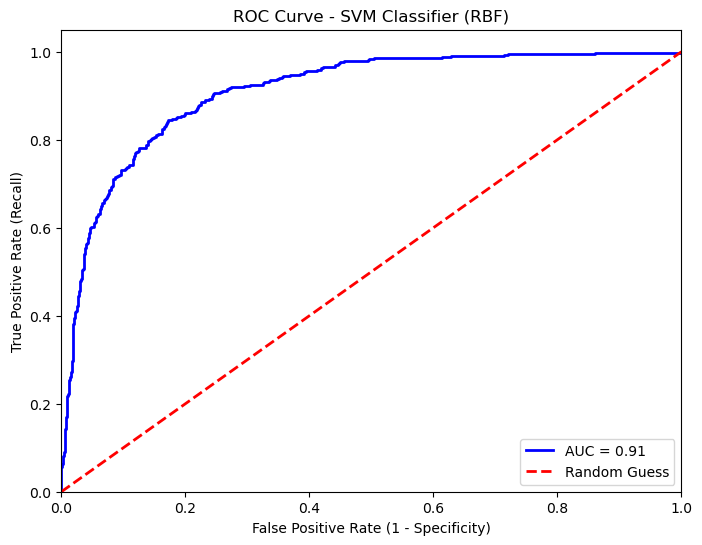

In [59]:
# ROC Curve
y_probs_svc = svc.predict_proba(X_test_clf_scaled)[:, 1]   # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs_svc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - SVM Classifier (RBF)')
plt.legend(loc="lower right")
plt.savefig("../visualisations/roc_curve_svm_rbf.png", dpi=300, bbox_inches="tight")
plt.show()

In [46]:
with open("../models/svc_model.pkl", "wb") as f:
    pickle.dump(svc, f)

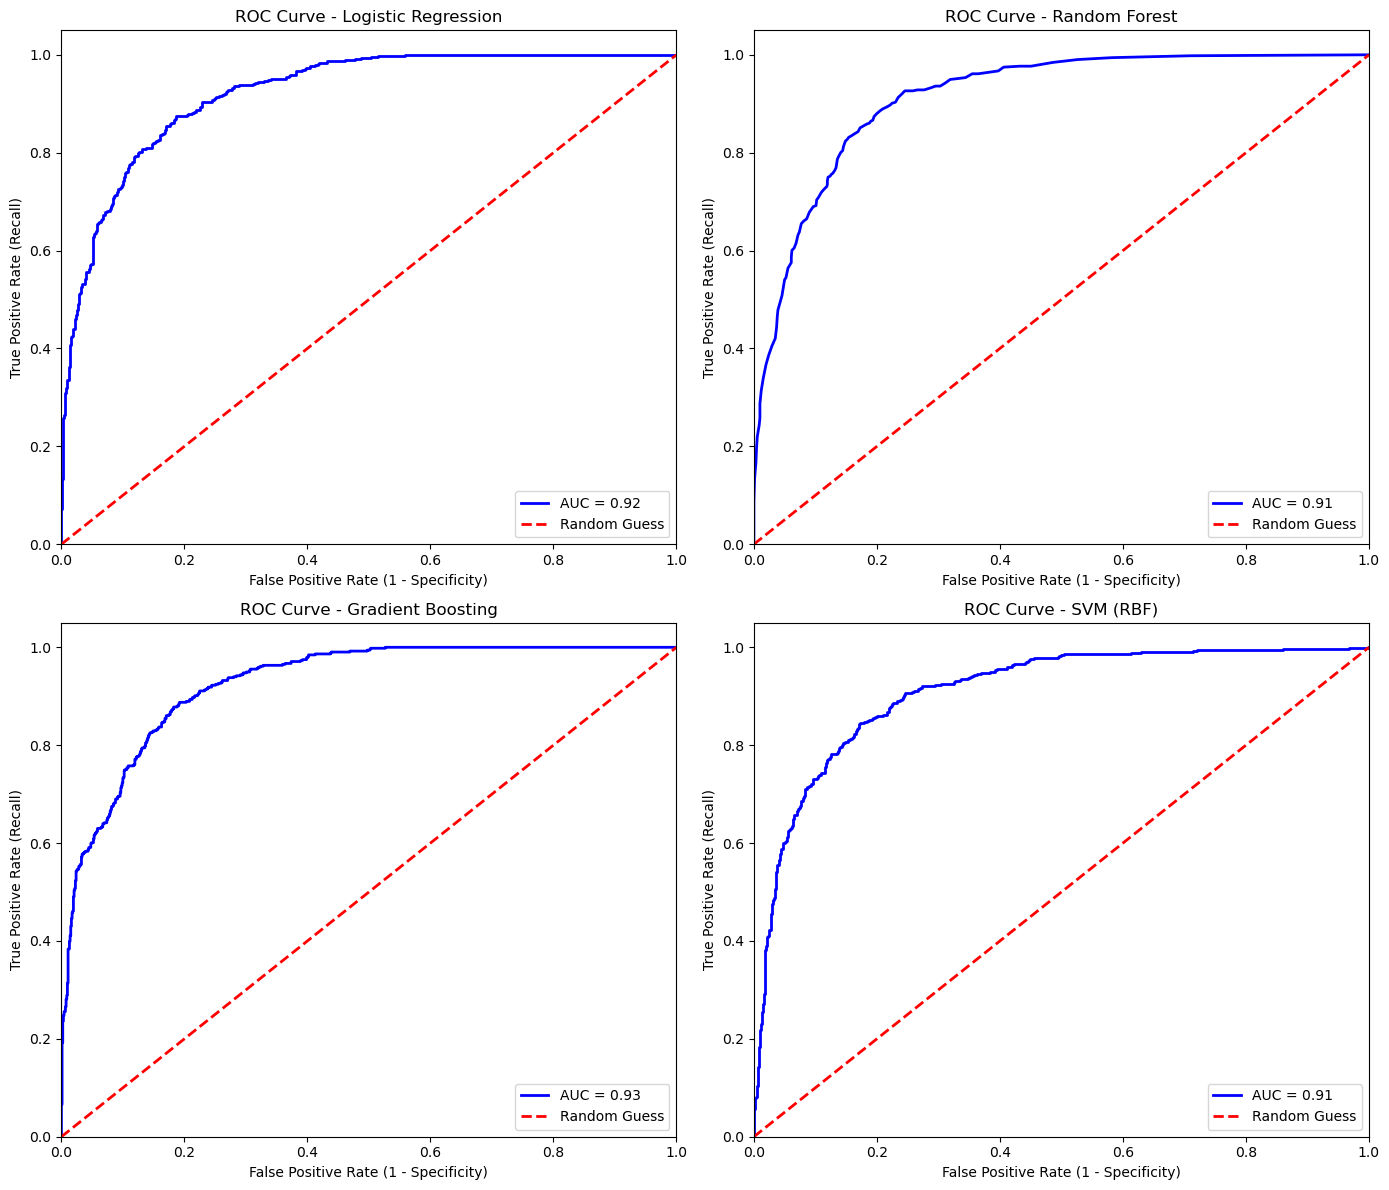

In [62]:
# Dictionary of models (already trained)
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "SVM (RBF)": svc
}

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14,12))
axes = axes.ravel()  # flatten for easy iteration

for i, (name, model) in enumerate(models.items()):
    # Choose correct input set
    if name in ["Random Forest", "Gradient Boosting"]:
        X_test_input = X_test_clf
    else:  # Logistic Regression, SVM
        X_test_input = X_test_clf_scaled

    # Get scores/probabilities
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_input)[:, 1]
    else:  # SVM without predict_proba
        y_scores = model.decision_function(X_test_input)
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_clf, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot on its own subplot
    axes[i].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[i].plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Random Guess')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate (1 - Specificity)')
    axes[i].set_ylabel('True Positive Rate (Recall)')
    axes[i].set_title(f'ROC Curve - {name}')
    axes[i].legend(loc="lower right")

plt.tight_layout()
plt.savefig("../visualisations/roc_curves_grid.png", dpi=300, bbox_inches="tight")
plt.show()

### Discussion of Classification Results  

All three classifiers performed well, with accuracies around **83–84%**, indicating that the models were generally effective at distinguishing between positive and negative ratings.  

- **Random Forest Classifier** achieved an accuracy of **83.2%**, with balanced precision and recall, making it a stable performer.  
- **Gradient Boosting Classifier** slightly outperformed the others with the highest accuracy (**83.9%**) and recall (**79.5%**), suggesting it was best at capturing true positives, though at a minor cost to precision.  
- **SVM Classifier (RBF)** delivered the highest precision (**78.4%**) but slightly lower recall (**75.9%**), meaning it was more conservative and better at avoiding false positives.  

Overall, the results are close, but **Gradient Boosting** provides the best trade-off between precision and recall, while **SVM** is preferable if minimizing false positives is more important.  

C:\Users\Nigel\AppData\Local\r-miniconda\envs\py311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nigel\AppData\Local\r-miniconda\envs\py311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


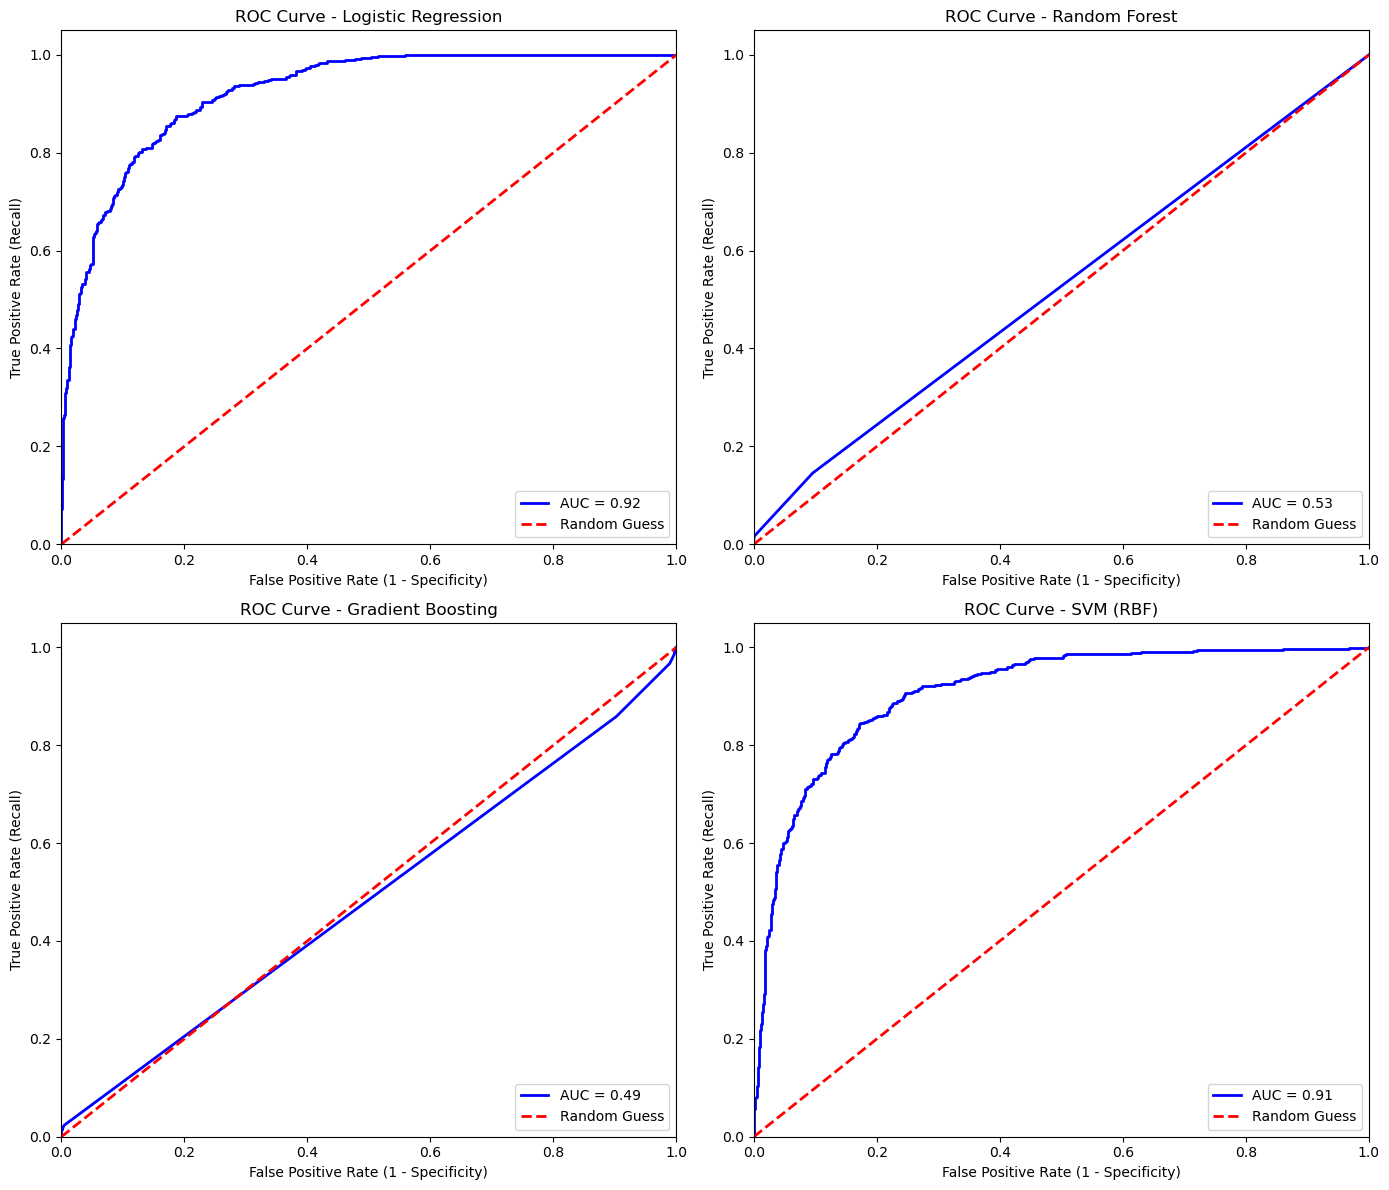

In [53]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "SVM (RBF)": svc
}

# Create subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14,12))

# Flatten axes for easy iteration
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    # Predicted probabilities
    # Logistic Regression, Random Forest, Gradient Boosting
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_clf_scaled)[:,1]
    # SVM with probability=True
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_test_clf_scaled)
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[i].plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Random Guess')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate (1 - Specificity)')
    axes[i].set_ylabel('True Positive Rate (Recall)')
    axes[i].set_title(f'ROC Curve - {name}')
    axes[i].legend(loc="lower right")

plt.tight_layout()

# Save combined figure
plt.savefig("../visualisations/roc_curves_classification_grid.png", dpi=300, bbox_inches="tight")
plt.show()

## 4. PySpark Models

In [47]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, StringType, IntegerType
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC

In [48]:
# Start Spark
spark = SparkSession.builder \
    .appName("Predictive Modelling Assignment") \
    .getOrCreate()

In [49]:
# Define schema explicitly
schema = StructType([
    StructField("address", StringType(), True),
    StructField("cost", DoubleType(), True),
    StructField("cuisine", StringType(), True),
    StructField("lat", DoubleType(), True),
    StructField("link", StringType(), True),
    StructField("lng", DoubleType(), True),
    StructField("phone", StringType(), True),
    StructField("rating_number", DoubleType(), True),
    StructField("rating_text", StringType(), True),
    StructField("subzone", StringType(), True),
    StructField("phone", StringType(), True),
    StructField("type", StringType(), True),
    StructField("votes", DoubleType(), True),
    StructField("groupon", StringType(), True),
    StructField("color", StringType(), True),
    StructField("cost_2", DoubleType(), True),
    StructField("cuisine_color", StringType(), True),
    StructField("subzone_clean", StringType(), True),
    StructField("rating_text_encoded", DoubleType(), True),
    StructField("cuisine_diversity", DoubleType(), True),
    StructField("rating_binary", DoubleType(), True)
])

# Now create Spark DataFrame with fixed schema
df_spark = spark.createDataFrame(df_clean, schema=schema)

# Quick check
df_spark.printSchema()

root
 |-- address: string (nullable = true)
 |-- cost: double (nullable = true)
 |-- cuisine: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- link: string (nullable = true)
 |-- lng: double (nullable = true)
 |-- phone: string (nullable = true)
 |-- rating_number: double (nullable = true)
 |-- rating_text: string (nullable = true)
 |-- subzone: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- type: string (nullable = true)
 |-- votes: double (nullable = true)
 |-- groupon: string (nullable = true)
 |-- color: string (nullable = true)
 |-- cost_2: double (nullable = true)
 |-- cuisine_color: string (nullable = true)
 |-- subzone_clean: string (nullable = true)
 |-- rating_text_encoded: double (nullable = true)
 |-- cuisine_diversity: double (nullable = true)
 |-- rating_binary: double (nullable = true)



In [50]:
# Quick sanity check
df_spark.printSchema()
df_spark.show(5)

root
 |-- address: string (nullable = true)
 |-- cost: double (nullable = true)
 |-- cuisine: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- link: string (nullable = true)
 |-- lng: double (nullable = true)
 |-- phone: string (nullable = true)
 |-- rating_number: double (nullable = true)
 |-- rating_text: string (nullable = true)
 |-- subzone: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- type: string (nullable = true)
 |-- votes: double (nullable = true)
 |-- groupon: string (nullable = true)
 |-- color: string (nullable = true)
 |-- cost_2: double (nullable = true)
 |-- cuisine_color: string (nullable = true)
 |-- subzone_clean: string (nullable = true)
 |-- rating_text_encoded: double (nullable = true)
 |-- cuisine_diversity: double (nullable = true)
 |-- rating_binary: double (nullable = true)



Py4JJavaError: An error occurred while calling o42.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (NIGELS-DESKTOP executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4333)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4323)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4321)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4321)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3316)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3539)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more


In [ ]:
# assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
# df_spark_ml = assembler.transform(df_spark_ml)

In [ ]:
# train, test = df_spark_ml.randomSplit([0.8, 0.2], seed=42)

### 4.1. Linear Regression Model

In [ ]:
# # Define model
# lr = LinearRegression(featuresCol="features", labelCol="rating_number")
# lr_model = lr.fit(train)

# # Predictions
# lr_predictions = lr_model.transform(test)

# # Evaluation
# evaluator = RegressionEvaluator(labelCol="rating_number", predictionCol="prediction")

# mse_lr = evaluator.evaluate(lr_predictions, {evaluator.metricName: "mse"})
# rmse_lr = evaluator.evaluate(lr_predictions, {evaluator.metricName: "rmse"})
# r2_lr = evaluator.evaluate(lr_predictions, {evaluator.metricName: "r2"})

# print("PySpark Linear Regression:")
# print(f"MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

### 4.2. SVM

In [ ]:
# # Define model
# svm = LinearSVC(featuresCol="features", labelCol="rating_binary", maxIter=100)
# svm_model = svm.fit(train)

# # Predictions
# svm_predictions = svm_model.transform(test)

# # Evaluation
# evaluator_acc = MulticlassClassificationEvaluator(
#     labelCol="rating_binary", predictionCol="prediction", metricName="accuracy"
# )
# evaluator_f1 = MulticlassClassificationEvaluator(
#     labelCol="rating_binary", predictionCol="prediction", metricName="f1"
# )

# accuracy_svm = evaluator_acc.evaluate(svm_predictions)
# f1_svm = evaluator_f1.evaluate(svm_predictions)

# print("PySpark Linear SVM:")
# print(f"Accuracy: {accuracy_svm:.4f}, F1-score: {f1_svm:.4f}")